## k-means algorithm to build clusters between customers

This notebook is to build a model that will determine the types of customers by their Age, Annual Income and Spending Score

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.shape

(200, 5)

In [6]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customers.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [8]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* The average age of the customers is ~39 while the maximum and minimum age are 70 and 18 respectively.
* The average annual income of the customers is 60,000 with lowest income being 15,000 and maximum at 137,000
* The average spending score is 50 with minimum at 1 and maximum at 99

## Clustering with Age

In [9]:
cols_to_keep = ['Age', 'Spending Score (1-100)']

In [10]:
customers1 = customers[cols_to_keep].copy()

In [11]:
centroids = customers1.sample(2)

In [12]:
def fetch_coordinates(df):
    age_centroid_1 = df.iloc[0, 0]
    score_centroid_1 = df.iloc[0, 1]
    age_centroid_2 = df.iloc[1, 0]
    score_centroid_2 = df.iloc[1, 1]
    return age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2
  

In [13]:
age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)

Create a scatter plot of the Age and Spending Score.

also  create a scatter plot from the centroids DataFrame In the same axes

Use a different color and size to highlight the centroids

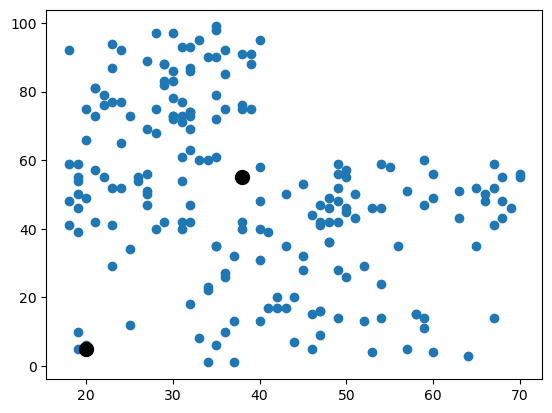

In [14]:
plt.scatter(customers1['Age'], customers1['Spending Score (1-100)'])
plt.scatter(centroids['Age'], centroids['Spending Score (1-100)'], color='black', s=100)
plt.show()

###  Distances Between the Points

Now that we've initialized the first couple of centroids, we need to calculate the (Euclidean) distance between each customer to each of the centroids.

In [15]:
def calculate_distance(s, age_centroid, score_centroid):
    distance = np.sqrt((s.loc['Age'] - age_centroid)**2 + (s.loc['Spending Score (1-100)'] - score_centroid)**2)
    return distance


In [16]:
customers1['dist_centroid_1'] = customers1.apply(calculate_distance, args=(age_centroid_1, score_centroid_1), axis=1)
customers1['dist_centroid_2'] = customers1.apply(calculate_distance, args=(age_centroid_2, score_centroid_2), axis=1)

In [17]:
print(customers1.head())

   Age  Spending Score (1-100)  dist_centroid_1  dist_centroid_2
0   19                      39        34.014703        24.839485
1   21                      81        76.006579        31.064449
2   20                       6         1.000000        52.201533
3   23                      77        72.062473        26.627054
4   31                      40        36.687873        16.552945


In [18]:
def calculate_distance_assign_clusters(customers, centroids):
    age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)
    customers1['dist_centroid_1'] = customers1.apply(
        calculate_distance, args=(age_centroid_1, score_centroid_1), axis=1
    )
    customers1['dist_centroid_2'] = customers1.apply(
        calculate_distance, args=(age_centroid_2, score_centroid_2), axis=1
    )
    customers1['cluster'] = np.where(
        customers1['dist_centroid_1'] < customers1['dist_centroid_2'], 1, 2
    )
    return customers1

In [19]:
customers1 = calculate_distance_assign_clusters(customers1, centroids)

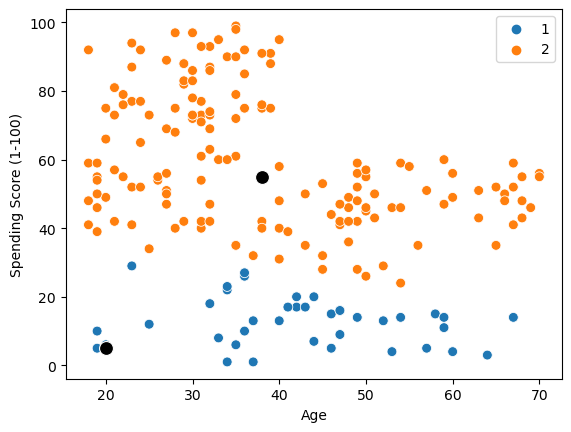

In [20]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster', palette='tab10', data=customers1, s=50)
sns.scatterplot(x='Age', y='Spending Score (1-100)', color='black', data=centroids, s=100)
plt.show()

### Creating New Clusters

We have our first cluster split. However, the K-means algorithm consists of multiple iterations until the centroids converge to the mean of their clusters.
* Calculate the distance of each customer to the new centroids.
* Assign new clusters to the customer based on the new distances.
* Visualize the new clusters.

In [21]:
new_centroids = customers1.groupby('cluster')[['Age', 'Spending Score (1-100)']].mean().reset_index()

In [22]:
new_centroids.drop('cluster', axis=1, inplace=True)

In [23]:
new_centroids

,Age,Spending Score (1-100)
0,42.170732,12.682927
1,37.993711,59.874214


In [24]:
customers1 = calculate_distance_assign_clusters(customers, new_centroids)

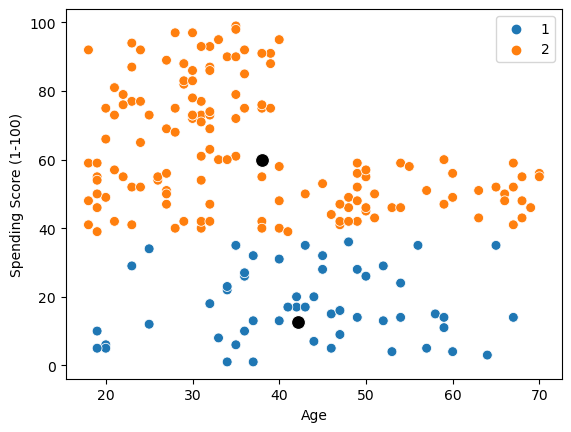

In [25]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster', palette='tab10', data=customers1, s=50)
sns.scatterplot(x='Age', y='Spending Score (1-100)', color='black', data=new_centroids, s=100)
plt.show()

There was a change in the color of some clusters around the 60 score mark, meaning that they changed from cluster 2 to 1

## Clustering with Annual Income

In [26]:
cols_reserved = ['Annual Income (k$)', 'Spending Score (1-100)']

In [27]:
customers2 = customers[cols_reserved].copy()

In [28]:
def get_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()


In [29]:
centroids, coords = get_centroids(customers2, 2)

In [30]:
print(centroids)
print(coords)

   Annual Income (k$)  Spending Score (1-100)
0                  60                      47
1                  47                      52
[[60, 47], [47, 52]]


In [31]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i + 1}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    
    return df, names


In [32]:
customers2, dist_names = calculate_distance(customers2, coords)

In [33]:
print(customers2)
print(dist_names)

     Annual Income (k$)  Spending Score (1-100)  dist_centroid_1   
0                    15                      39        45.705580  \
1                    15                      81        56.400355   
2                    16                       6        60.141500   
3                    16                      77        53.254108   
4                    17                      40        43.566042   
..                  ...                     ...              ...   
195                 120                      79        68.000000   
196                 126                      28        68.680419   
197                 126                      74        71.309186   
198                 137                      18        82.280010   
199                 137                      83        85.000000   

     dist_centroid_2  
0          34.539832  
1          43.185646  
2          55.470713  
3          39.824616  
4          32.310989  
..               ...  
195        77.833155  

In [34]:
customers2['cluster'] = customers2[dist_names].idxmin(axis=1)

In [35]:
customers2['cluster'] = customers2[dist_names].idxmin(axis=1).str.split('_').str[-1]
print(customers2)

     Annual Income (k$)  Spending Score (1-100)  dist_centroid_1   
0                    15                      39        45.705580  \
1                    15                      81        56.400355   
2                    16                       6        60.141500   
3                    16                      77        53.254108   
4                    17                      40        43.566042   
..                  ...                     ...              ...   
195                 120                      79        68.000000   
196                 126                      28        68.680419   
197                 126                      74        71.309186   
198                 137                      18        82.280010   
199                 137                      83        85.000000   

     dist_centroid_2 cluster  
0          34.539832       2  
1          43.185646       2  
2          55.470713       2  
3          39.824616       2  
4          32.310989       2

C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


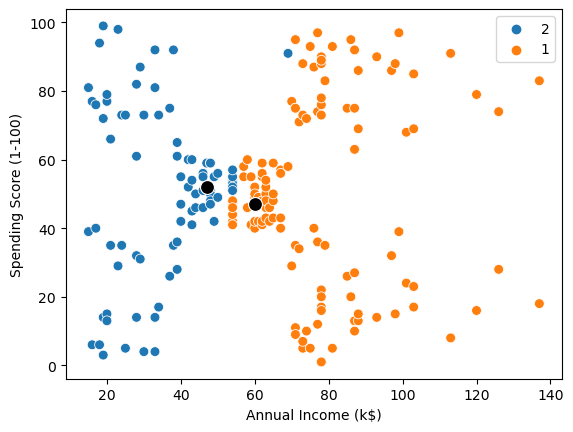

In [36]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='cluster', palette='tab10', data=customers2, s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', color='black', data=centroids, s=100)
plt.show()

In [37]:
variables = customers2.columns[:2]


In [38]:
new_centroids = round(customers2.groupby('cluster')[variables].mean(), 4)
new_coords = new_centroids.values.tolist()

In [39]:
print(new_centroids)
print(new_coords)

         Annual Income (k$)  Spending Score (1-100)
cluster                                            
1                   77.6555                 49.6639
2                   35.4444                 50.9877
[[77.6555, 49.6639], [35.4444, 50.9877]]


In [40]:
variables = customers2.columns

In [41]:
for i in range(100): 
    customers2, dist_names = calculate_distance(customers2, coords)

    customers2['cluster'] = customers2[dist_names].idxmin(axis=1).str.split('_').str[-1]

    centroids = round(customers2.groupby('cluster')[variables].mean(), 4)
    coords = centroids.values.tolist()

print(f'Total Iterations: {i + 1}')

Total Iterations: 100


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


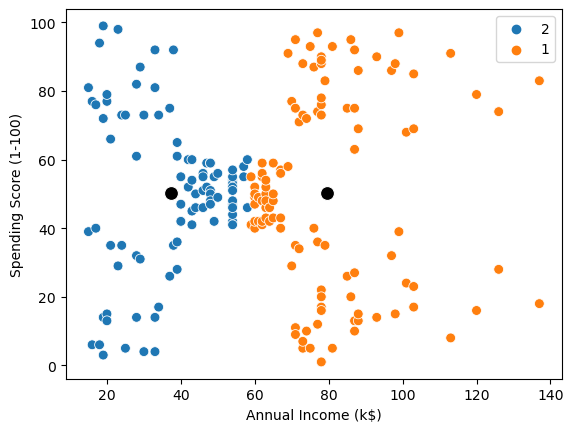

In [42]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='cluster', palette='tab10', data=customers2, s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', color='black', data=centroids, s=100)

plt.show()

In [43]:
centroids, coords  = get_centroids(customers2, 2)

In [44]:
for i in range(100):
    last_coords = coords.copy()

    customers2, dist_names = calculate_distance(customers2, coords)

    customers2['cluster'] = customers2[dist_names].idxmin(axis=1).str.split('_').str[-1]

    centroids = round(customers2.groupby('cluster')[variables].mean(), 4)
    coords = centroids.values.tolist()
                    
    if last_coords == coords:
        break

print(f'Total Iterations: {i + 1}')
                    

Total Iterations: 6


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


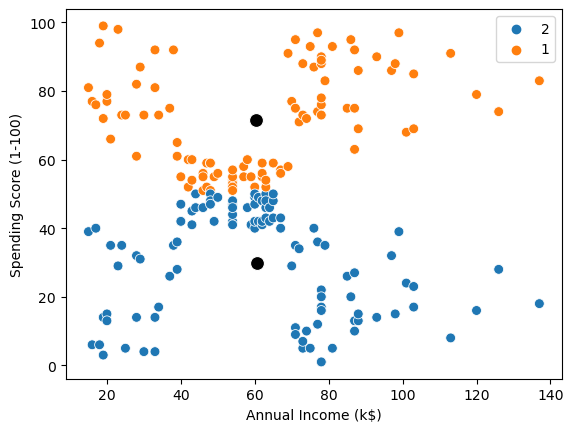

In [45]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='cluster', palette='tab10', data=customers2, s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', color='black', data=centroids, s=100)

plt.show()

Total Iterations: 6


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


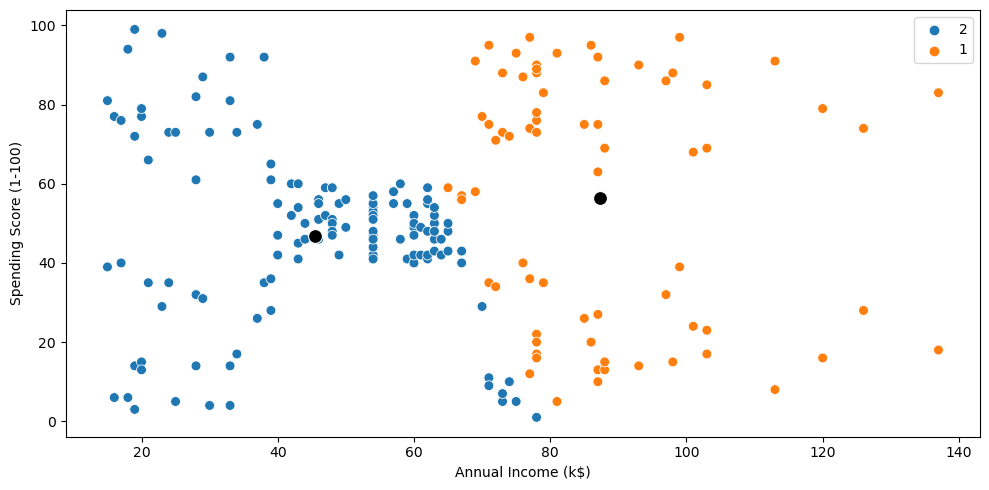

In [46]:
def kmeans(df, k, n_iterations=100):
    variables = customers2.columns
    
    centroids, coords = get_centroids(df, k)
    
    for i in range(n_iterations):
        last_coords = coords.copy()
        
        df, dists = calculate_distance(df, coords)
        
        df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1]
        
        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        coords = centroids.values.tolist()
        
        if last_coords == coords:
      	    break
    
    print(f'Total Iterations: {i + 1}')
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(variables[0], variables[1], hue='cluster', palette='tab10', data=df, s=50, ax=ax)
    sns.scatterplot(variables[0], variables[1], color='black', data=centroids, s=100, ax=ax)
    
    plt.tight_layout()
    plt.show()

    return df['cluster']

  
clusters = kmeans(customers2, 2)




In [56]:
def kmeans(df, k, n_iterations=100):
    variables = df.columns

    centroids, coords = get_centroids(df, k)

    for i in range(n_iterations):
        last_coords = coords.copy()

        df, dists = calculate_distance(df, coords)

        df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1]

        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        coords = centroids.values.tolist()

        if last_coords == coords:
          	break
        
    df['sqrt_dist_centroid'] = df[dists].min(axis=1)**2
    inertia = df['sqrt_dist_centroid'].sum()
    
    print(f'Total Iterations: {i + 1}')

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(variables[0], variables[1], hue='cluster', palette='tab10', data=df, s=50, ax=ax)
    sns.scatterplot(variables[0], variables[1], color='black', data=centroids, s=100, ax=ax)


    plt.tight_layout()
    plt.show()

    return df['cluster'], inertia


Total Iterations: 7


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


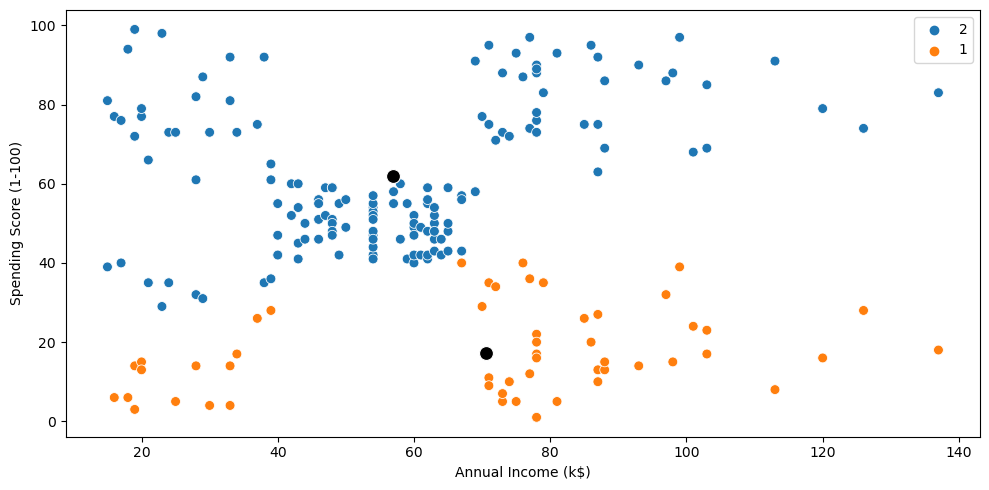

0      2
1      2
2      1
3      2
4      2
      ..
195    2
196    1
197    2
198    1
199    2
Name: cluster, Length: 200, dtype: object 184609.98434114002


In [60]:
clusters, inertia = kmeans(customers2, k=2)
print(clusters, inertia)

In [61]:
inertias = []

Total Iterations: 3


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


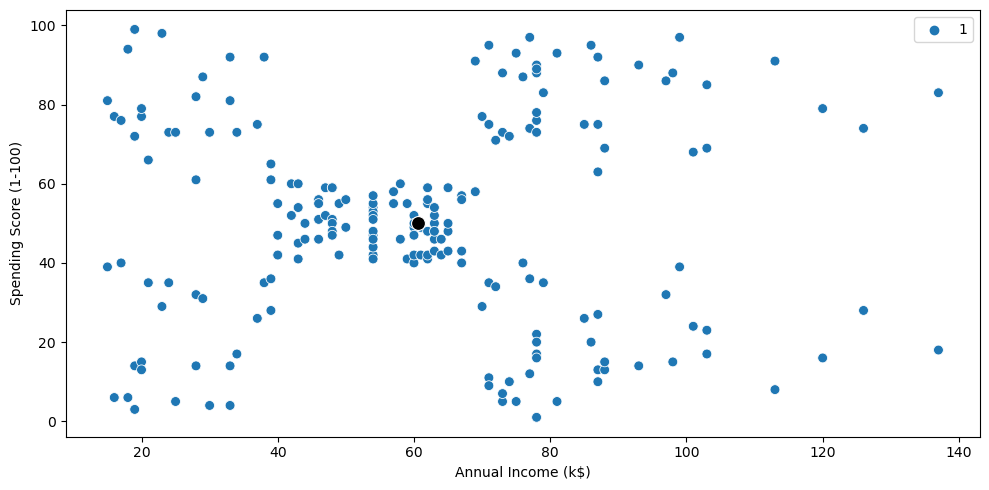

Total Iterations: 5


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


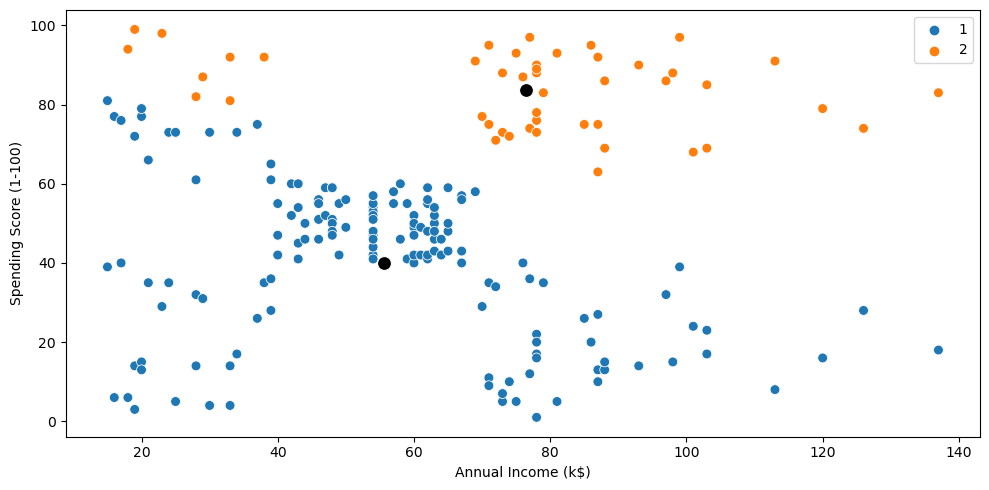

Total Iterations: 11


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


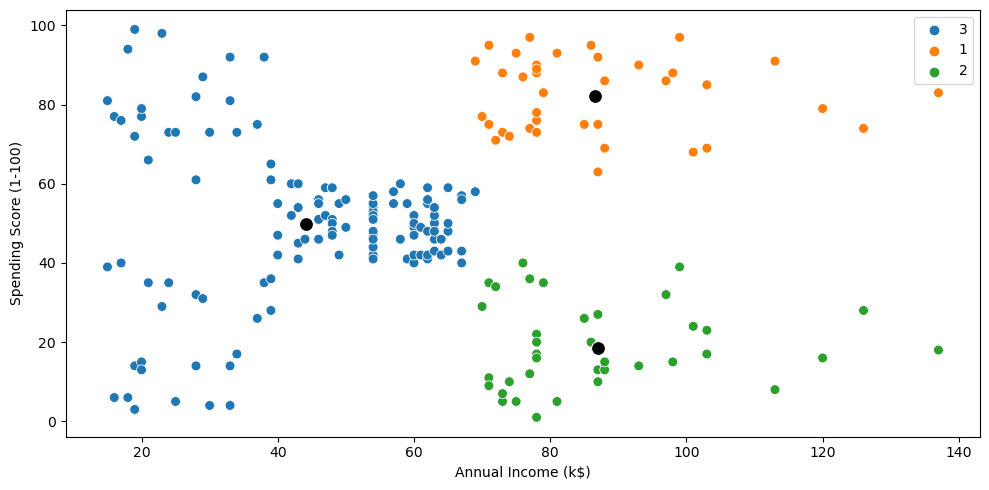

Total Iterations: 5


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


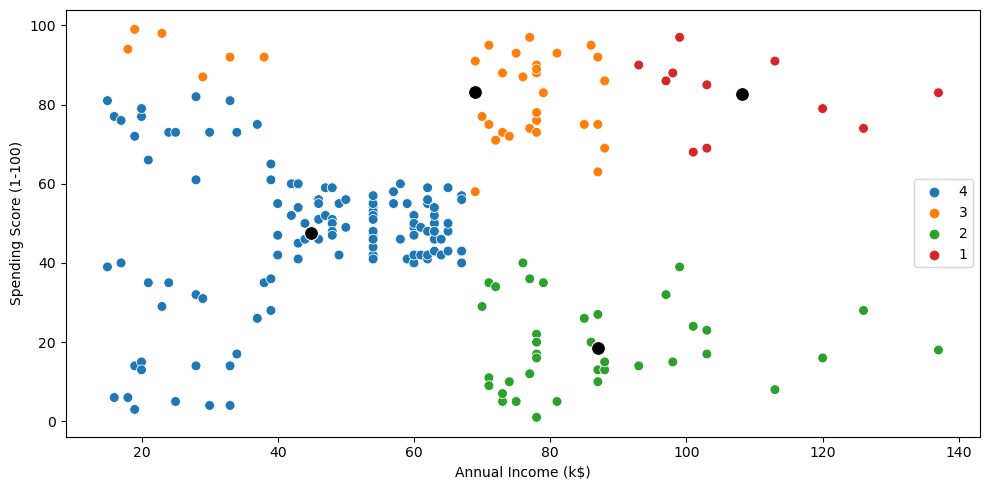

Total Iterations: 8


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


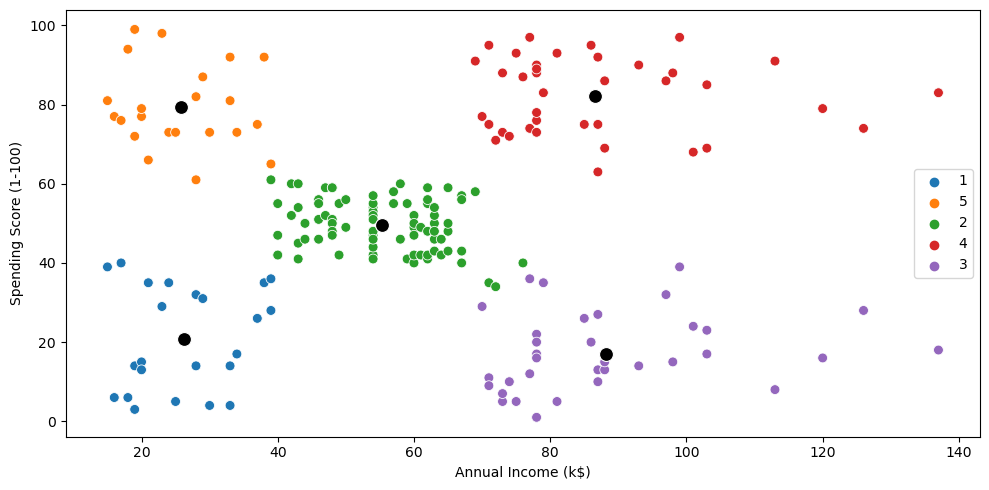

Total Iterations: 6


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


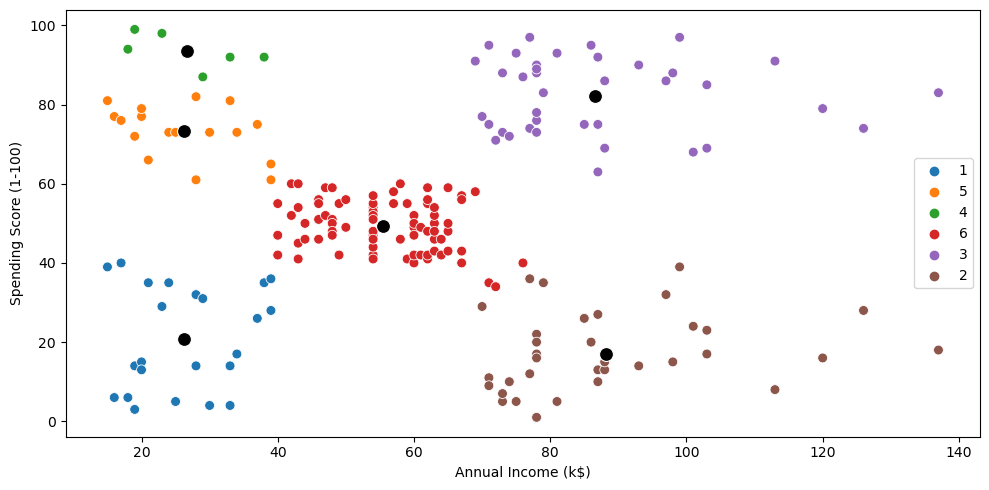

Total Iterations: 7


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


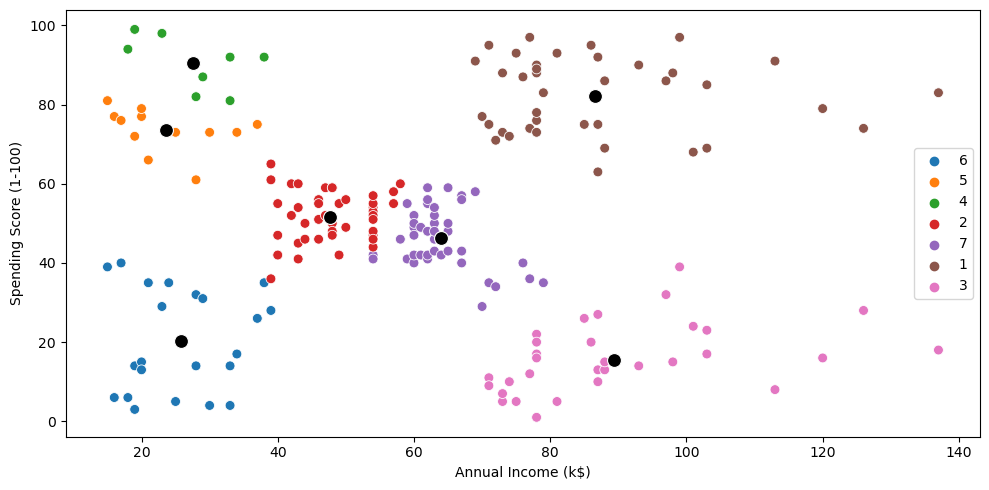

Total Iterations: 20


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


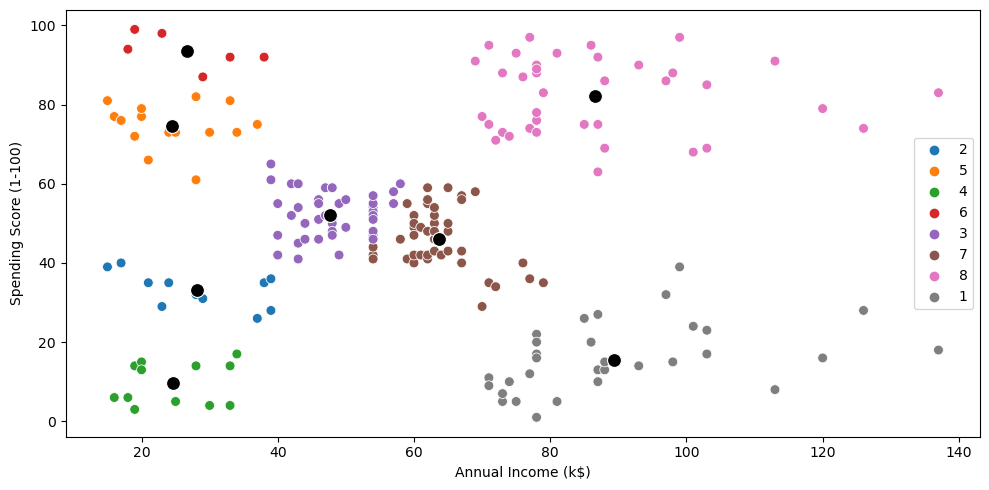

Total Iterations: 17


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


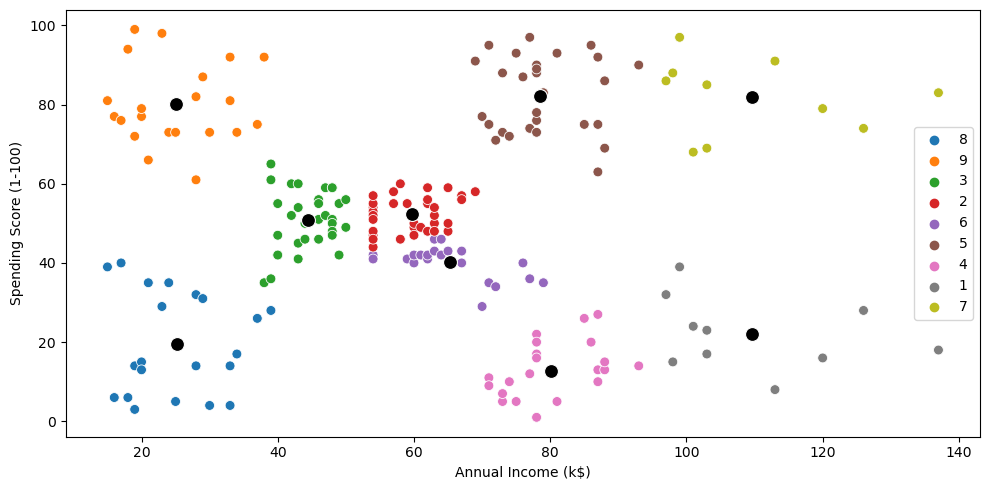

Total Iterations: 100


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


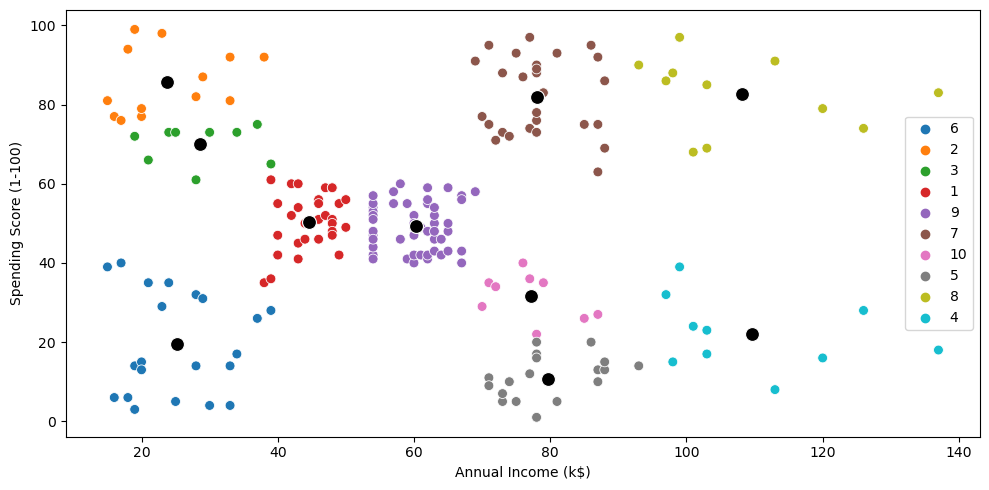

[269981.27999999997, 185917.14253957, 106348.37306241, 98806.00142031, 44448.45544817, 42684.83586999, 37285.22196591, 34018.0566874, 22868.17546004, 21618.939491309997]


In [63]:
inertias = []
for k in range(1,11):
    clusters, inertia = kmeans(customers2, k=k)
    inertias.append(inertia)
    
print(inertias)

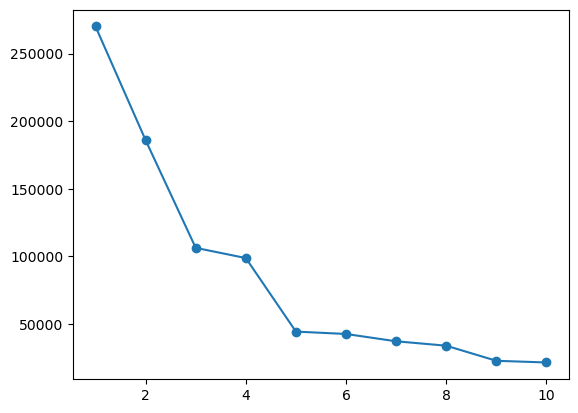

In [64]:
plt.plot(range(1, 11), inertias, marker='o')
plt.show()

Total Iterations: 11


C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Belema Amah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


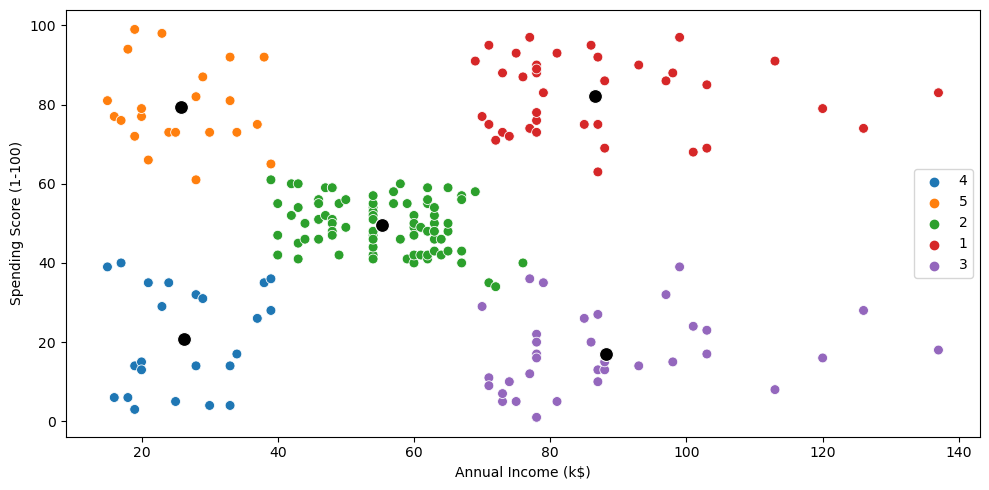

0      4
1      5
2      4
3      5
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: cluster, Length: 200, dtype: object 44448.45544817


In [65]:
clusters, inertia = kmeans(customers2, k=5)
print(clusters, inertia)